Health Risk Prediction (BMI) - Complete Notebook

This notebook demonstrates a Health Risk Prediction System using PyTorch.
It predicts a person’s BMI (Body Mass Index) based on their Sleep Hours, Daily Steps, and Daily Calories Intake.

We also provide health recommendations based on predicted BMI.

Step 1: Import Libraries

We start by importing all the required libraries:

pandas, numpy → data handling

matplotlib, seaborn → visualization

torch → deep learning framework (PyTorch)

scikit-learn → preprocessing & evaluation metrics

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Create Dummy Dataset

We create a synthetic dataset of 15 individuals with the following features:

SleepHours: Average daily sleep hours

DailySteps: Steps taken per day

CaloriesIntake: Daily calorie intake

BMI: Body Mass Index (target variable)

This dataset simulates lifestyle factors that impact BMI.

In [35]:
# Dummy dataset (15 rows)
data = {
    'SleepHours': [7, 6, 8, 5, 7, 6, 7, 8, 5, 6, 7, 8, 6, 7, 5],
    'DailySteps': [7000, 8000, 6500, 9000, 7500, 8200, 7800, 6000, 9500, 7200, 8000, 6700, 8800, 7300, 9100],
    'CaloriesIntake': [2200, 2100, 2500, 2000, 2300, 2400, 2250, 2150, 2050, 2350, 2450, 2550, 2100, 2200, 2000],
    'BMI': [23.5, 22.0, 25.0, 21.5, 24.0, 26.0, 23.0, 22.5, 20.5, 25.5, 24.5, 27.0, 21.0, 23.0, 20.0]
}
df = pd.DataFrame(data)

# Display the dataset
df.head(15)

,SleepHours,DailySteps,CaloriesIntake,BMI
0,7,7000,2200,23.5
1,6,8000,2100,22.0
2,8,6500,2500,25.0
3,5,9000,2000,21.5
4,7,7500,2300,24.0
5,6,8200,2400,26.0
6,7,7800,2250,23.0
7,8,6000,2150,22.5
8,5,9500,2050,20.5
9,6,7200,2350,25.5


Step 3: FData Preprocessing & Feature Scaling

To prepare data for training:

Extract features (SleepHours, DailySteps, CaloriesIntake) as X

Target variable BMI as y

Use StandardScaler to normalize features for better training convergence

Convert scaled features back into a DataFrame for inspection

In [36]:
# Import scaler
from sklearn.preprocessing import StandardScaler

# Features and target
X = df[['SleepHours', 'DailySteps', 'CaloriesIntake']]
y = df['BMI']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy viewing
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head(15)

,SleepHours,DailySteps,CaloriesIntake
0,0.455661,-0.780406,-0.230684
1,-0.520756,0.228740,-0.807394
2,1.432078,-1.284979,1.499446
3,-1.497172,1.237886,-1.384104
4,0.455661,-0.275833,0.346026
5,-0.520756,0.430569,0.922736
6,0.455661,0.026911,0.057671
7,1.432078,-1.789553,-0.519039
8,-1.497172,1.742459,-1.095749
9,-0.520756,-0.578577,0.634381


Step 4: Model Building & Training (PyTorch)

We implement a Linear Regression model in PyTorch:

Input: 3 features (sleep, steps, calories)

Output: 1 value (predicted BMI)

Loss Function: Mean Squared Error (MSE)

Optimizer: Stochastic Gradient Descent (SGD)

Training details:

Epochs = 1000

Loss values are tracked to ensure convergence

Training loss is plotted to visualize learning progress

Epoch 200 | Loss: 0.2435
Epoch 400 | Loss: 0.2430
Epoch 600 | Loss: 0.2430
Epoch 800 | Loss: 0.2430
Epoch 1000 | Loss: 0.2430


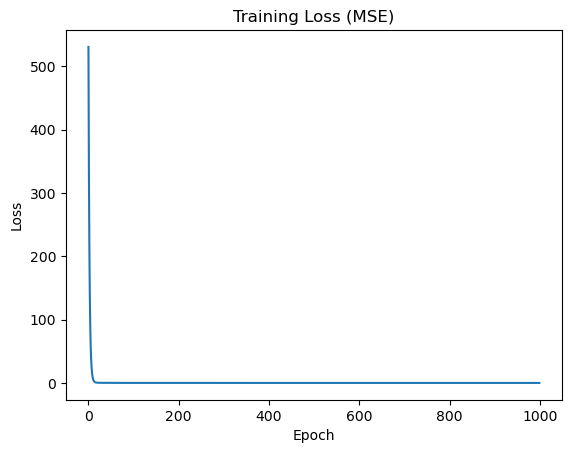

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Define a simple linear regression model
model = nn.Linear(3, 1)  # 3 input features, 1 output (BMI)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    preds = model(X_tensor)
    loss = criterion(preds, y_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch+1) % 200 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss.item():.4f}")

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

Step 5: Model Evaluation

We evaluate the trained model using:

Mean Squared Error (MSE) → Measures prediction error

R² Score → Measures how well features explain BMI variance

Additionally, we:

Plot Actual vs Predicted BMI to assess prediction quality

Draw a diagonal reference line (perfect prediction line)

Mean Squared Error (MSE): 0.2430
R² Score: 0.9397


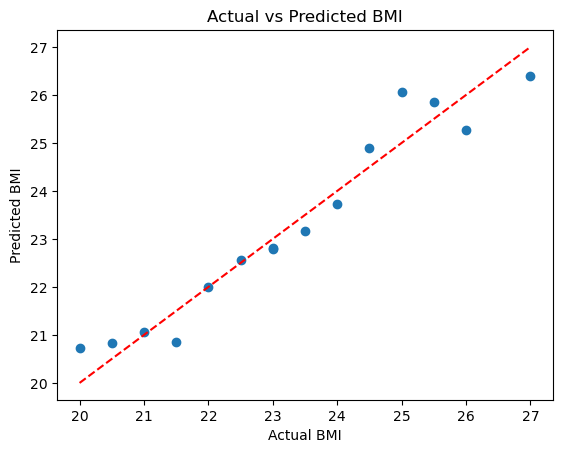

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Model predictions
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).numpy()

# Calculate metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted BMI
plt.scatter(y, y_pred)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

Step 6: User Input Prediction

We allow the user to enter their own lifestyle values:

Sleep hours

Daily steps

Calorie intake

The model predicts the BMI for the given input after scaling the features.

In [39]:
# User input
sleep = float(input("Enter Sleep Hours: "))
steps = float(input("Enter Daily Steps: "))
calories = float(input("Enter Calories Intake: "))

# Prepare input for prediction
user_sample = np.array([[sleep, steps, calories]])
user_sample_df = pd.DataFrame(user_sample, columns=X.columns)
user_sample_scaled = scaler.transform(user_sample_df)
user_sample_tensor = torch.tensor(user_sample_scaled, dtype=torch.float32)

# Predict BMI
model.eval()
with torch.no_grad():
    user_pred_bmi = model(user_sample_tensor).item()

print(f"Predicted BMI for your input: {user_pred_bmi:.2f}")

Enter Sleep Hours:  7
Enter Daily Steps:  7000
Enter Calories Intake:  2200


Predicted BMI for your input: 23.16


Step 7: Model Accuracy

We display the R² Score as Accuracy to provide a simple performance indicator for end-users.

In [40]:
print(f"Model Accuracy: {int(r2 * 100)}%")

Model Accuracy: 93%


Step 8: Visualization & Health Tips

BMI Distribution → Histogram + KDE to understand population spread

Health Tips Function → Provides personalized suggestions:

Underweight → Improve diet, consult doctor

Normal → Maintain lifestyle

Overweight → Increase activity, monitor food

Obese → Seek medical guidance

This step adds practical health insights beyond just numbers.

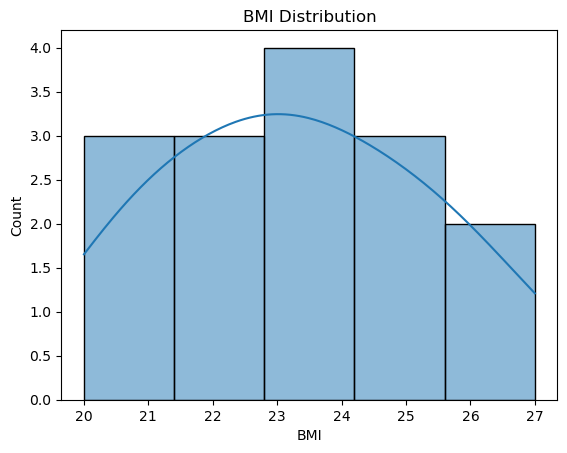

Health Tip: Normal: Maintain your healthy lifestyle!


In [41]:
import seaborn as sns

# Visualize BMI distribution
sns.histplot(df['BMI'], bins=5, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.show()

# Health tips based on BMI
def health_tip(bmi):
    if bmi < 18.5:
        return "Underweight: Consider a balanced diet and consult a doctor."
    elif bmi < 25:
        return "Normal: Maintain your healthy lifestyle!"
    elif bmi < 30:
        return "Overweight: Try to increase physical activity and monitor diet."
    else:
        return "Obese: Consult a healthcare professional for guidance."

print("Health Tip:", health_tip(user_pred_bmi))

Step 11: Model Saving & Loading

To make the model reusable:

Save trained weights as bmi_model.pth

Load them back into a new PyTorch model

This ensures the trained model can be deployed or reused later.

In [42]:
# Save model
torch.save(model.state_dict(), "bmi_model.pth")

# Load model
model_loaded = nn.Linear(3, 1)
model_loaded.load_state_dict(torch.load("bmi_model.pth"))

<All keys matched successfully>